## Purpose: 
Develop a classification pipeline to predict if a passnger from the Titanic survived or not. 

Dataset can be obtained from Kaggle: https://www.kaggle.com/c/titanic/overview 

### Final Results: 
Random Forest accuracy: 0.8373283395755307
Decision Tree accuracy: 0.8294257178526842
Linear SVM accuracy: 0.8115106117353308
SVM RBF accuracy: 0.8282771535580524
Logistic Regression accuracy: 0.8148564294631712

Random forest and Linear SVM classifiers appeared to work the best. Decision tree, SVM RBF, and linear regression appear to be categorizing most of the test dataset as "Alive"


## Prepare Training Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Load data file and print data head to check proper loading
df = pd.read_csv('Datasets/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check number of rows
print(f'Train - Number of rows: {df.shape[0]}')

Train - Number of rows: 891


In [3]:
# Check for duplicates, this adds a new column to the dataset
df["is_duplicate"]= df.duplicated()

print(f"Training data size = {len(df)}")
print(f"Duplicates in TRAINING data = {len(df[df['is_duplicate']==True])}")

Training data size = 891
Duplicates in TRAINING data = 0


In [4]:
# Print rows which have True in column 'is_duplicate'
df[df['is_duplicate']==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_duplicate


In [5]:
# Drop the duplicate rows using index
index_to_drop = df[df['is_duplicate']==True].index
df.drop(index_to_drop, inplace=True)

# Remove the duplicate marker column
df.drop(columns='is_duplicate', inplace=True)
print(f'Training count = {len(df)}')

Training count = 891


In [6]:
# Do we have NaN in our dataset?
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
# Display NaN values
display(df[df['Age'].isnull()])
display(df[df['Cabin'].isnull()])
display(df[df['Embarked'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
# Mean values of numerical columns
means = {c:df[c].mean() for c in df.columns if df[c].dtype != object}

print(f"mean-age= {means['Age']}")

# Impute 
df['Age'] = df['Age'].fillna(means['Age'])

mean-age= 29.69911764705882


In [9]:
# Drop "Cabin" feature due to missing dataset being large
df.drop(columns='Cabin', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
display(df['Embarked'].value_counts())

print('Mode: Training - Embarked', df['Embarked'].value_counts().index[0])

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Mode: Training - Embarked S


In [11]:
# Impute the null value with the highest frequency value in "Embarked"
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
# Check again if we have NaN in our dataset
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

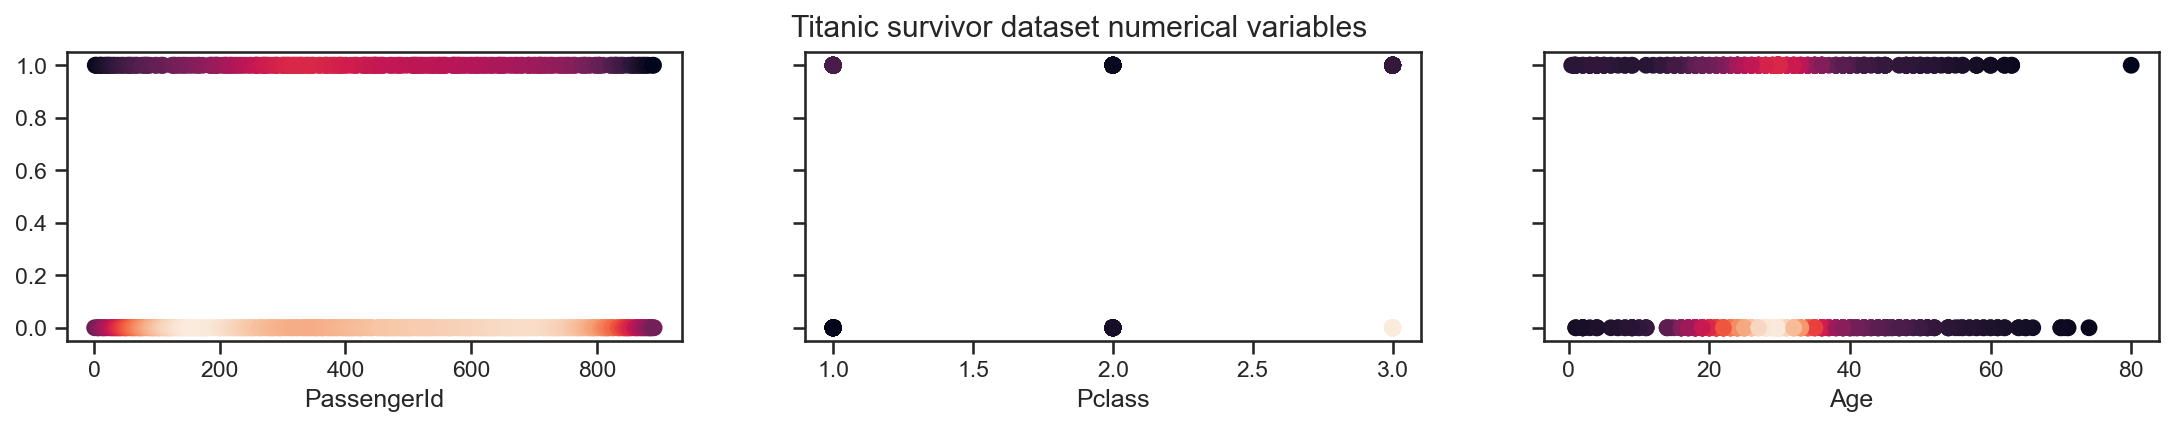

In [13]:
# Use kernel density estimation to color the density
from scipy.stats import gaussian_kde

# We will reuse this plotting function later
def plot_bc_numericals_group1(_df):
    fig, axs = plt.subplots(1, 3, figsize=(18, 2.5), sharey=True, dpi=150)
    y = _df['Survived'].astype('category').cat.codes.ravel()
    xy = np.vstack([_df['PassengerId'],y]); z = gaussian_kde(xy)(xy)
    axs[0].scatter(_df['PassengerId'], _df['Survived'], c=z, s=50, edgecolor=None)
    axs[0].set_xlabel('PassengerId')
    xy = np.vstack([_df['Pclass'],y]); z = gaussian_kde(xy)(xy)
    axs[1].scatter(_df['Pclass'], _df['Survived'], c=z, s=50, edgecolor=None)
    axs[1].set_xlabel('Pclass')
    xy = np.vstack([_df['Age'],y]); z = gaussian_kde(xy)(xy)
    axs[2].scatter(_df['Age'], _df['Survived'], c=z, s=50, edgecolor=None)
    axs[2].set_xlabel('Age')

    fig.suptitle('Titanic survivor dataset numerical variables')
    plt.show()

plot_bc_numericals_group1(df)

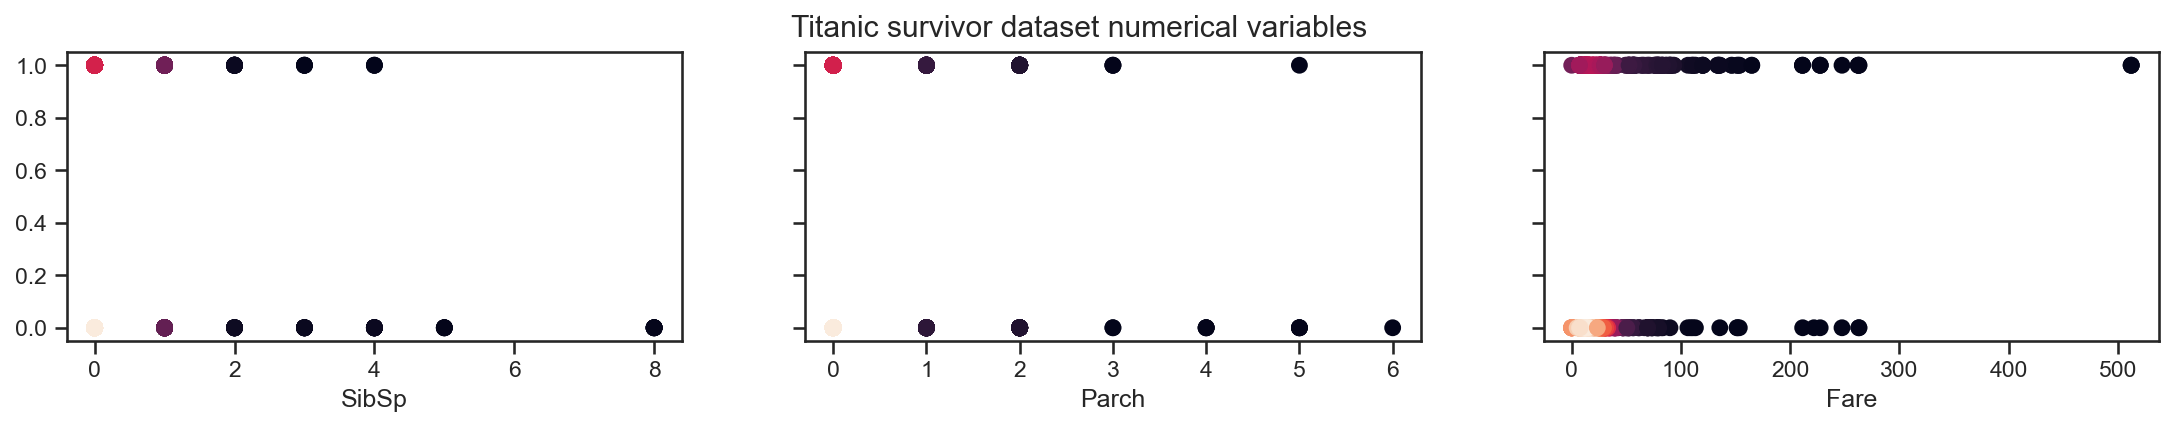

In [14]:
def plot_bc_numericals_group2(_df):
    fig, axs = plt.subplots(1, 3, figsize=(18, 2.5), sharey=True, dpi=150)
    y = _df['Survived'].astype('category').cat.codes.ravel()
    xy = np.vstack([_df['SibSp'],y]); z = gaussian_kde(xy)(xy)
    axs[0].scatter(_df['SibSp'], _df['Survived'], c=z, s=50, edgecolor=None)
    axs[0].set_xlabel('SibSp')
    xy = np.vstack([_df['Parch'],y]); z = gaussian_kde(xy)(xy)
    axs[1].scatter(_df['Parch'], _df['Survived'], c=z, s=50, edgecolor=None)
    axs[1].set_xlabel('Parch')
    xy = np.vstack([_df['Fare'],y]); z = gaussian_kde(xy)(xy)
    axs[2].scatter(_df['Fare'], _df['Survived'], c=z, s=50, edgecolor=None)
    axs[2].set_xlabel('Fare')


    fig.suptitle('Titanic survivor dataset numerical variables')
    plt.show()

plot_bc_numericals_group2(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


#total= 888


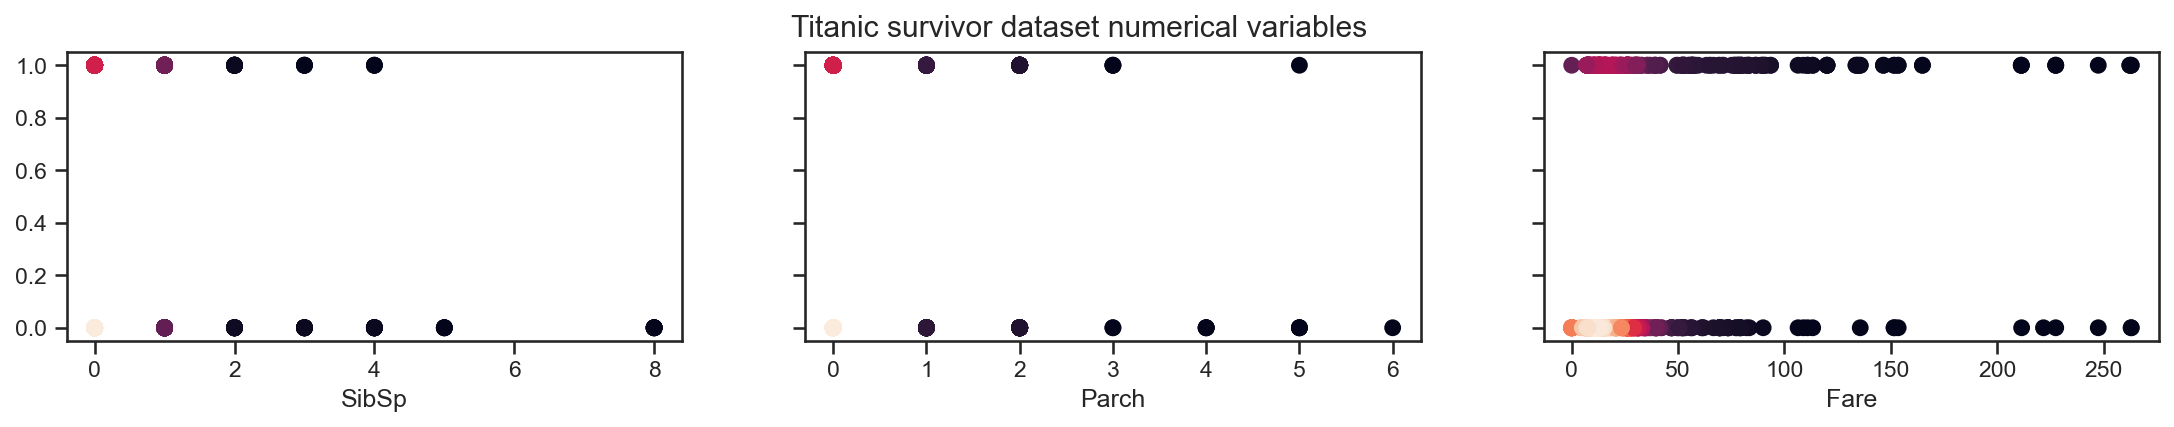

In [15]:
# Remove that line with the incorrect age=250 and age=-5
dftemp = df.copy()  # use a temporary DataFrame
display(dftemp[dftemp['Fare']>=350])
index_to_drop = dftemp[dftemp['Fare']>=350].index
dftemp.drop(index_to_drop, inplace=True)

# Check results
print(f'#total= {len(dftemp)}')
plot_bc_numericals_group2(dftemp)

In [16]:
# Reset the indices to the dataframe after cleaning rows
dftemp = dftemp.reset_index(drop=True)

In [17]:
# Remove "Ticket" and "PassengerId" because they are each unique identifiers that cannot be used
df.drop('PassengerId', inplace=True, axis = 1)
df.drop('Ticket', inplace=True, axis = 1)

In [18]:
# Preview features that will be used in predictions
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


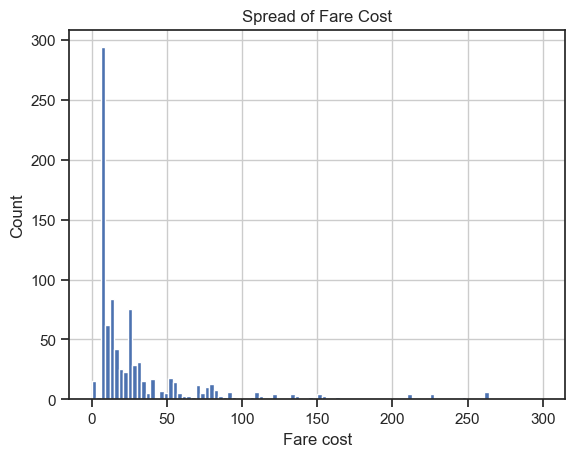

In [19]:
# Graph out spread of Fare costs
df['Fare'].hist(bins=100, range=(0,300))
plt.title('Spread of Fare Cost')
plt.xlabel('Fare cost')
plt.ylabel('Count')
plt.show()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

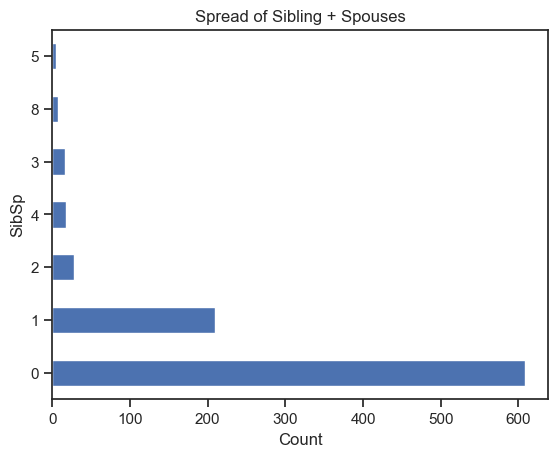

In [20]:
# Spread of passenger siblings + spouses
display(df['SibSp'].value_counts())

df['SibSp'].value_counts().plot(kind='barh', xlabel='Count', title='Spread of Sibling + Spouses') ;

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

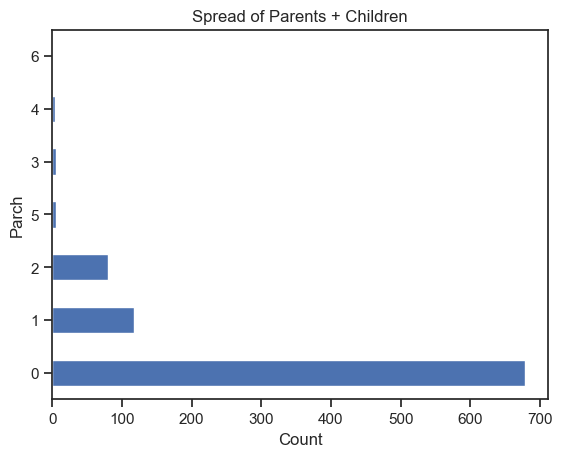

In [21]:
# Spread of passenger parents + children
display(df['Parch'].value_counts())

df['Parch'].value_counts().plot(kind='barh', xlabel='Count', title='Spread of Parents + Children') ;

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

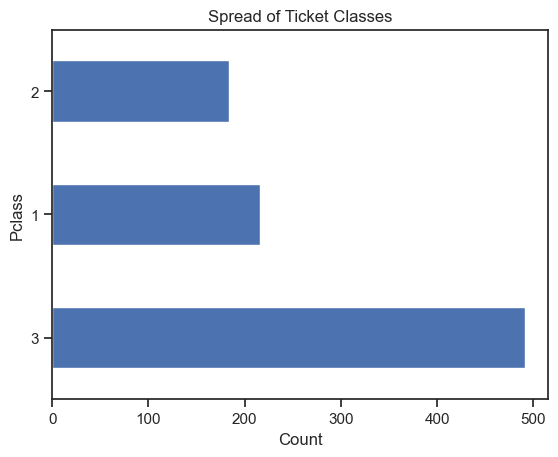

In [22]:
# Spread of passenger ticket classes
display(df['Pclass'].value_counts())

df['Pclass'].value_counts().plot(kind='barh', xlabel='Count', title='Spread of Ticket Classes') ;

Survived
0    549
1    342
Name: count, dtype: int64

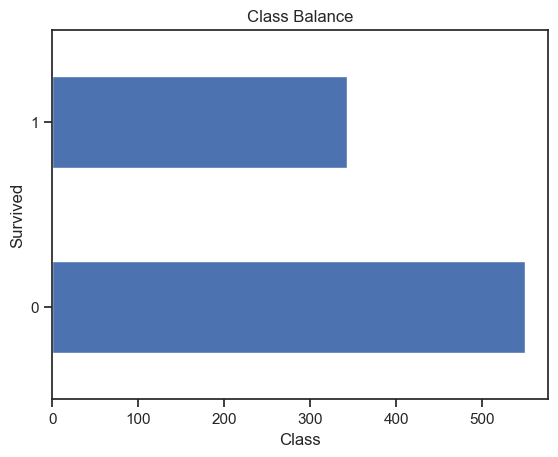

In [23]:
# Figure out if dependent variable is unbalanced
display(df['Survived'].value_counts())

df['Survived'].value_counts().plot(kind='barh', xlabel='Class', title='Class Balance') ;

In [24]:
# Convert "Names" to title identifiers
df['Name'] = df['Name'].str.split(pat=',',expand = True)[1].str.split(pat='.',expand=True)[0].apply(lambda x: x.strip())

In [25]:
# Check datatypes for each feature so that I can convert nominal values to numerical
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [26]:
# One-hot encoder to convert nominal features into numerical values
def encode_onehot(_df, _f):
    _df2 = pd.get_dummies(_df[_f], prefix='', prefix_sep='').groupby(level=0, axis=1).max().add_prefix(_f+' - ')
    _df3 = pd.concat([_df, _df2], axis=1)
    _df3 = _df3.drop([_f], axis=1)
    return _df3

# Print nominal variables
for f in list(df.columns.values):
    if df[f].dtype == object:
        print(f) 

Name
Sex
Embarked


In [27]:
# One hot encode nominal features
df_o = encode_onehot(df, 'Name')
df_o = encode_onehot(df_o, 'Sex')
df_o = encode_onehot(df_o, 'Embarked')

In [28]:
df_o = df_o.astype(float)
df_o.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name - Capt,Name - Col,Name - Don,Name - Dr,...,Name - Mrs,Name - Ms,Name - Rev,Name - Sir,Name - the Countess,Sex - female,Sex - male,Embarked - C,Embarked - Q,Embarked - S
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Prepare Testing Data

In [29]:
# Load testing dataset
df_testing = pd.read_csv('Datasets/test.csv')

# Copy to be used for submission
df_testing_copy = df_testing.copy()

In [30]:
# Check number of rows
print(f'Test - Number of rows: {df_testing.shape[0]}')

Test - Number of rows: 418


In [31]:
# Check for duplicates, this adds a new column to the dataset
df_testing["is_duplicate"]= df_testing.duplicated()

print(f"Testing data size = {len(df_testing)}")
print(f"Duplicates in TESTING data = {len(df_testing[df_testing['is_duplicate']==True])}")

Testing data size = 418
Duplicates in TESTING data = 0


In [32]:
# Print rows which have True in column 'is_duplicate'
df_testing[df_testing['is_duplicate']==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_duplicate


In [33]:
# Drop the duplicate rows using index
index_to_drop = df_testing[df_testing['is_duplicate']==True].index
df_testing.drop(index_to_drop, inplace=True)

# Remove the duplicate marker column
df_testing.drop(columns='is_duplicate', inplace=True)
print(f'Testing count= {len(df_testing)}')

Testing count= 418


In [34]:
# Do we have NaN in our dataset?
df_testing.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [35]:
# Display NaN values
display(df_testing[df_testing['Age'].isnull()])
display(df_testing[df_testing['Fare'].isnull()])
display(df_testing[df_testing['Cabin'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [36]:
# Imput mean age into testing dataset
mean_age_testing = {c:df_testing[c].mean() for c in df_testing.columns if df_testing[c].dtype != object}
print(f"Mean Age - Testing = {mean_age_testing['Age']}")

df_testing['Age'] = df_testing['Age'].fillna(mean_age_testing['Age'])

# Impute mean fare value into dataset
mean_fare_testing = {c:df_testing[c].mean() for c in df_testing.columns if df_testing[c].dtype != object}
print(f"Mean Fare - Testing = {mean_fare_testing['Fare']}")

df_testing['Fare'] = df_testing['Fare'].fillna(mean_fare_testing['Fare'])

Mean Age - Testing = 30.272590361445783
Mean Fare - Testing = 35.627188489208635


In [37]:
# Drop "Cabin" feature due to missing dataset being large
df_testing.drop(columns='Cabin', inplace=True)
df_testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [38]:
# Impute the null value with the highest frequency value in "Embarked"
df_testing['Embarked'].fillna(df_testing['Embarked'].mode()[0], inplace=True)

In [39]:
# Check unique levels and see any marker is used or left out for a missing level
for col in df_testing.columns:
    if df_testing[col].dtype == object:
        print (col, df_testing[col].unique())

Name ['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Ilieff, Mr. Ylio' 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Flegenheim, Mrs. Alfred (Antoinette)'
 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram' 'Samaan, Mr. Elias'
 'Louch, Mr. Charles Alexander' 'Jefferys,

In [40]:
# Check again if we have NaN in our dataset
df_testing.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [41]:
# Remove "Ticket" and "PassengerId" because they are each unique identifiers that cannot be used
df_testing.drop('PassengerId', inplace=True, axis = 1)
df_testing.drop('Ticket', inplace=True, axis = 1)

In [42]:
df_testing.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [43]:
# Convert "Names" to title identifiers
df_testing['Name'] = df_testing['Name'].str.split(pat=',',expand = True)[1].str.split(pat='.',expand=True)[0].apply(lambda x: x.strip())

In [44]:
# Check datatypes for each feature so that I can convert nominal values to numerical
df_testing.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [45]:
# One hot encode nominal features
df_testing_o = encode_onehot(df_testing, 'Name')
df_testing_o = encode_onehot(df_testing_o, 'Sex')
df_testing_o = encode_onehot(df_testing_o, 'Embarked')

In [46]:
df_testing_o = df_testing_o.astype(float)
df_testing_o.head()

,Pclass,Age,SibSp,Parch,Fare,Name - Col,Name - Dona,Name - Dr,Name - Master,Name - Miss,Name - Mr,Name - Mrs,Name - Ms,Name - Rev,Sex - female,Sex - male,Embarked - C,Embarked - Q,Embarked - S
0,3.0,34.5,0.0,0.0,7.8292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,62.0,0.0,0.0,9.6875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3.0,27.0,0.0,0.0,8.6625,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [47]:
# Missing columns in training set must be added to the testing set
difference_df = df_o.columns.difference(df_testing_o.columns)
difference_df.to_numpy()
for index in difference_df:
    df_testing_o[index] = 0
df_testing_o = df_testing_o.drop('Name - Dona', axis=1)

In [48]:
# Prepare the input X matrix and target y vector
X = df_o.loc[:, df_o.columns != 'Survived'].values
y = df_o.loc[:, df_o.columns == 'Survived'].values.ravel()
X_test = df_testing_o.loc[:, df_testing_o.columns != 'Survived'].values

## Random Forest

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split


accuracy_holder = []

rf = RandomForestClassifier(n_estimators = 100, 
                                            max_depth = 10,
                                            max_features = 15,
                                            random_state=0, 
                                            n_jobs = -1)


kfold = StratifiedKFold(n_splits = 10)
for train_count, test_count in kfold.split(X,y):
    rf.fit(X[train_count], y[train_count])
    y_pred = rf.predict(X[test_count])
    accuracy_holder += [accuracy_score(y[test_count], y_pred)]
print(f'Random Forest accuracy: {np.mean(accuracy_holder)}')

Random Forest accuracy: 0.8373283395755307


In [50]:
# Run the prediction
rf.fit(X,y)
rf_prediction = rf.predict(X_test)

## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

accuracy_holder = []

decision_tree = DecisionTreeClassifier(criterion='gini',
                                       max_depth=4,
                                       max_features = 40,
                                       random_state=1)

kfold = StratifiedKFold(n_splits = 10)
for train_count, test_count in kfold.split(X,y):
    decision_tree.fit(X[train_count], y[train_count])
    y_pred = decision_tree.predict(X[test_count])
    accuracy_holder += [accuracy_score(y[test_count], y_pred)]
print(f'Decision Tree accuracy: {np.mean(accuracy_holder)}')

Decision Tree accuracy: 0.8294257178526842


In [52]:
# Run the prediction
decision_tree.fit(X,y)
dt_prediction = decision_tree.predict(X_test)

## Linear SVM

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_linear = make_pipeline(StandardScaler(), 
                           LinearSVC(dual=False, class_weight = 'balanced', max_iter = 10000))

accuracy_holder = []

kfold = StratifiedKFold(n_splits = 10)
for train_count, test_count in kfold.split(X,y):
    svm_linear.fit(X[train_count], y[train_count])
    y_pred = svm_linear.predict(X[test_count])
    accuracy_holder += [accuracy_score(y[test_count], y_pred)]
print(f'Linear SVM accuracy: {np.mean(accuracy_holder)}')

Linear SVM accuracy: 0.8115106117353308


In [54]:
# Run the prediction
svm_linear.fit(X,y)
svm_linear_prediction = svm_linear.predict(X_test)

## SVM RBF 

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_rbf = make_pipeline(StandardScaler(), 
                        SVC(kernel='rbf', gamma='scale', class_weight='balanced'))

accuracy_holder = []

kfold = StratifiedKFold(n_splits = 10)
for train_count, test_count in kfold.split(X,y):
    svm_rbf.fit(X[train_count], y[train_count])
    y_pred = svm_rbf.predict(X[test_count])
    accuracy_holder += [accuracy_score(y[test_count], y_pred)]
print(f'SVM RBF accuracy: {np.mean(accuracy_holder)}')

SVM RBF accuracy: 0.8282771535580524


In [56]:
# Run the prediction
svm_rbf.fit(X,y)
svm_rbf_prediction = svm_rbf.predict(X_test)

## Logistic Regression

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

lr = make_pipeline(StandardScaler(), 
                   LogisticRegression(solver='newton-cg', multi_class='auto', max_iter =600, class_weight='balanced'))

accuracy_holder = []

kfold = StratifiedKFold(n_splits = 10)
for train_count, test_count in kfold.split(X,y):
    lr.fit(X[train_count], y[train_count])
    y_pred = lr.predict(X[test_count])
    accuracy_holder += [accuracy_score(y[test_count], y_pred)]
print(f'Logistic Regression accuracy: {np.mean(accuracy_holder)}')

Logistic Regression accuracy: 0.8148564294631712


In [58]:
# Run the prediction
svm_rbf.fit(X,y)
lr_prediction = lr.predict(X_test)

In [59]:
def save_preds(_fn, _y_pred, _df): 
    import csv 
    with open(_fn, 'w') as fout: 
        writer = csv.writer(fout, delimiter=',', lineterminator='\n') 
        writer.writerow(['PassengerId', 'Survived']) 
        for yid, ypred in zip(_df['PassengerId'], _y_pred): 
            writer.writerow([yid, ypred]) 

In [60]:
save_preds('rf_predictions_naval.csv', rf_prediction, df_testing_copy) 
save_preds('dt_predictions_naval.csv', dt_prediction, df_testing_copy) 
save_preds('svm_linear_predictions_naval.csv', svm_linear_prediction, df_testing_copy) 
save_preds('svm_rbf_predictions_naval.csv', svm_rbf_prediction, df_testing_copy) 
save_preds('lr_predictions_naval.csv', lr_prediction, df_testing_copy) 


# Notes
Random forest and SVM linear classifiers appeared to work the best. Decision tree, SVM RBF, and linear regression appear to be categorizing most of the test dataset as "Alive". 